# Load and Process Audio

References: librosa https://librosa.github.io/librosa/index.html

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import re
import librosa.display
%matplotlib inline

### Pre-Processing Procedure

1. Load in all audio
2. Split into 10 s chunks
3. Check that all sections are 10s long and drop ones that are shorter
4. Save as dataframe of audio for each composer
5. Make sure to store piece number for each audio clip

### 1. Get all Audio Filenames

In [166]:
## List all files in directory and subdirectories
import os
from os.path import isfile, join

file_list = []
for path, subdirs, files in os.walk("Audio/"):
    for name in files:
        root, ext = os.path.splitext(name)
        if ext == '.mp3':
            print(os.path.join(path, name))
            file_list.append(os.path.join(path, name))

Audio/Hadyn/100-04 Haydn_ Symphony #100 In G, H 1_100, _Military_ - 4. Finale_ Presto.mp3
Audio/Hadyn/104-03 Haydn_ Symphony #104 In D, H 1_104, _London_ - 3. Menuet_ Allegro.mp3
Audio/Hadyn/98-04 Haydn_ Symphony #98 In B Flat, H 1_98 - 4. Finale_ Presto.mp3
Audio/Hadyn/96-02 Haydn_ Symphony #96 In D, H 1_96, _Miracle_ - 2. Andante.mp3
Audio/Hadyn/97-02 Haydn_ Symphony #97 In C, H 1_97 - 2. Adagio, Ma Non Troppo.mp3
Audio/Hadyn/102-02 Haydn_ Symphony #102 In B Flat, H 1_102 - 2. Adagio.mp3
Audio/Hadyn/95-02 Haydn_ Symphony #95 In C Minor, H 1_95 - 2. Andante.mp3
Audio/Hadyn/100-03 Haydn_ Symphony #100 In G, H 1_100, _Military_ - 3. Menuet_ Moderato.mp3
Audio/Hadyn/97-03 Haydn_ Symphony #97 In C, H 1_97 - 3. Menuet.mp3
Audio/Hadyn/104-02 Haydn_ Symphony #104 In D, H 1_104, _London_ - 2. Andante.mp3
Audio/Hadyn/96-03 Haydn_ Symphony #96 In D, H 1_96, _Miracle_ - 3. Menuet.mp3
Audio/Hadyn/101-03 Haydn_ Symphony #101 In D, H 1_101, _Clock_ - 3. Menuet_ Allegretto.mp3
Audio/Hadyn/93-03 Hayd

In [167]:
## Split file list into individual composers
brahms_list = [s for s in file_list if "Brahms" in s]
beethoven_list = [s for s in file_list if "Beethoven" in s]
haydn_list = [s for s in file_list if "Haydn" in s]
sibelius_list = [s for s in file_list if "Sibelius" in s]
tchaik_list = [s for s in file_list if "Tchaikovsky" in s]
brahms_list.sort()
beethoven_list.sort()
haydn_list.sort()
sibelius_list.sort()
tchaik_list.sort()

In [168]:
## Print number of unique pieces for each composer
print("Brahms:", len(brahms_list))
print("Beethoven:", len(beethoven_list))
print("Haydn:", len(haydn_list))
print("Sibelius:", len(sibelius_list))
print("Tchaikovsky:", len(tchaik_list))

Brahms: 16
Beethoven: 37
Haydn: 48
Sibelius: 23
Tchaikovsky: 27


### 2. Load in Audio,  Split into 10 s chunks

In [131]:
def split_audio(file_list):

    audio_list = list()
    piece_list = list()

    for filename in file_list:
        y, sr = librosa.load(filename) ## Load in
        y10 = np.split(y, np.arange(0, len(y), step = sr*10)[1:]) ## Split into 10 s chunks
        # Check if need to drop last slice, since less than 10 s
        if len(y10[-1]) < sr*10:
            y10 = y10[:-1]
        # Make into numpy array    
        piece = np.vstack(y10[:-1])
        # Get Piece name/number 
        pn = re.search('/(.+?) ', filename).group(1).split("/")[1]
        print(pn)
        # Repeat for number of splits there are
        pn = [pn]*len(y10)
        ## Append to list
        audio_list.append(piece)
        piece_list.append(pn)
        
    ## Flatten piece names
    pieces = [item for sublist in piece_list for item in sublist]
    audio_list = np.vstack(audio_list)
    return(audio_list, pieces)  

In [132]:
brahms, brahms_pieces = split_audio(brahms_list)

1-01
1-02
1-03
1-04
2-01
2-02
2-03
2-04
3-01
3-02
3-03
3-04
4-01
4-02
4-03
4-04


In [160]:
beethoven, beethoven_pieces = split_audio(beethoven_list)

00-01
00-02
00-03
00-04
1-01
1-02
1-03
1-04
2-01
2-02
2-03
2-04
3-01
3-02
3-03
3-04
4-01
4-02
4-03
4-04
5-01
5-02
5-03
5-04
6-01
6-02
6-03
6-04
6-05
7-01
7-02
7-03
7-04
8-01
8-02
8-03
8-04


In [161]:
haydn, haydn_pieces = split_audio(haydn_list)

100-01
100-02
100-03
100-04
101-01
101-02
101-03
101-04
102-01
102-02
102-03
102-04
103-01
103-02
103-03
103-04
104-01
104-02
104-03
104-04
93-01
93-02
93-03
93-04
94-01
94-02
94-03
94-04
95-01
95-02
95-03
95-04
96-01
96-02
96-03
96-04
97-01
97-02
97-03
97-04
98-01
98-02
98-03
98-04
99-01
99-02
99-03
99-04


In [169]:
sibelius, sibelius_pieces = split_audio(sibelius_list)

00-01
00-02
00-03
00-04
00-05
00-06
00-07
00-08
1-01
1-02
1-03
1-04
2-01
2-02
2-03
2-04
4-01
4-02
4-03
4-04
5-01
5-02
5-03


In [163]:
tchaik, tchaik_pieces = split_audio(tchaik_list)

00-01
00-02
1-01
1-02
1-03
1-04
2-01
2-02
2-03
2-04
3-01
3-02
3-03
3-04
3-05
4-01
4-02
4-03
4-04
5-01
5-02
5-03
5-04
6-01
6-02
6-03
6-04


In [172]:
## Count Number of 10s clips by composer
print("Brahms:", brahms.shape[0])
print("Beethoven:", beethoven.shape[0])
print("Haydn:", haydn.shape[0])
print("Sibelius:", sibelius.shape[0])
print("Tchaikovsky:", tchaik.shape[0])

Brahms: 908
Beethoven: 1748
Haydn: 1925
Sibelius: 1386
Tchaikovsky: 1698


In [175]:
## Save audio 
np.save("Data/brahms-audio", brahms, allow_pickle = False)
np.save("Data/beethoven-audio", beethoven, allow_pickle = False)
np.save("Data/haydn-audio", haydn, allow_pickle = False)
np.save("Data/sibelius-audio", sibelius, allow_pickle = False)
np.save("Data/tchaik-audio", tchaik, allow_pickle = False)

In [186]:
df = pd.DataFrame(index=range(len(haydn_pieces)),columns=['Brahms', 'Beethoven', 'Haydn', 'Sibelius', 'Tchaikovsky'])
df.iloc[0:len(brahms_pieces), 0] = brahms_pieces
df.iloc[0:len(beethoven_pieces), 1] = beethoven_pieces
df.iloc[0:len(haydn_pieces), 2] = haydn_pieces
df.iloc[0:len(sibelius_pieces), 3] = sibelius_pieces
df.iloc[0:len(tchaik_pieces), 4] = tchaik_pieces

In [187]:
df.head()

,Brahms,Beethoven,Haydn,Sibelius,Tchaikovsky
0,1-01,00-01,100-01,00-01,00-01
1,1-01,00-01,100-01,00-01,00-01
2,1-01,00-01,100-01,00-01,00-01
3,1-01,00-01,100-01,00-01,00-01
4,1-01,00-01,100-01,00-01,00-01


In [188]:
df.tail()

,Brahms,Beethoven,Haydn,Sibelius,Tchaikovsky
1968,NaN,NaN,99-04,NaN,NaN
1969,NaN,NaN,99-04,NaN,NaN
1970,NaN,NaN,99-04,NaN,NaN
1971,NaN,NaN,99-04,NaN,NaN
1972,NaN,NaN,99-04,NaN,NaN


In [189]:
df.to_csv('Data/labels.csv', index=False)

In [7]:
# brahms = np.load("Data/brahms-audio.npy")
# beethoven = np.load("Data/beethoven-audio.npy")
# haydn = np.load("Data/haydn-audio.npy")
# sibelius = np.load("Data/sibelius-audio.npy")
# tchaik = np.load("Data/tchaik-audio.npy")
# sr = 22050

## EDA

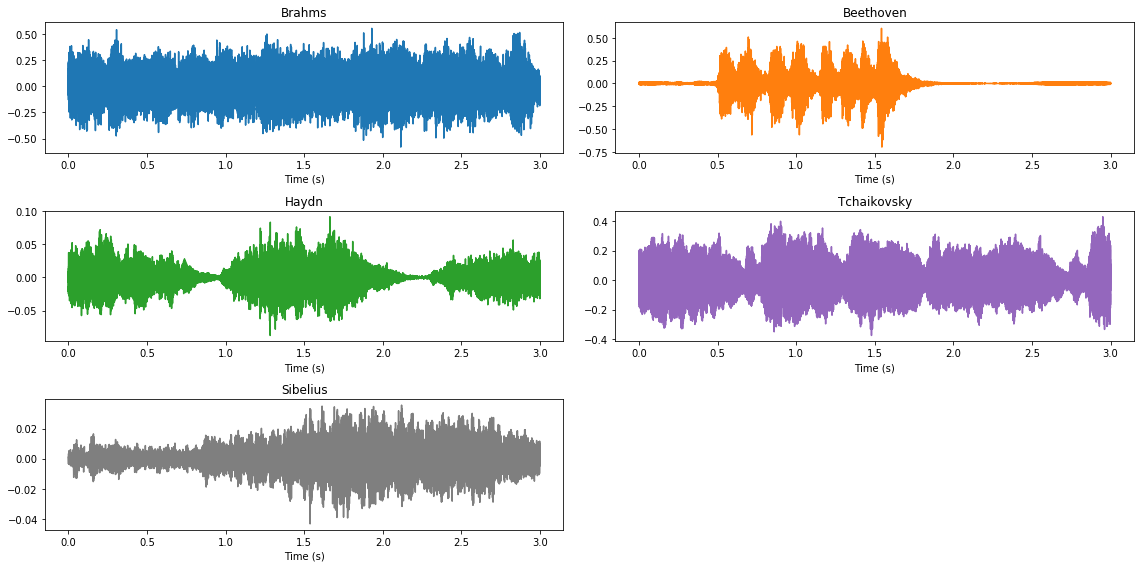

In [245]:
## Plot raw audio
x = np.linspace(start=0, stop=3, num=len(brahms[1,:]))
fig = plt.figure(figsize = (16,8))

plt.subplot(3, 2, 1)
plt.plot(x, brahms[3,:], color = "C0")
plt.xlabel("Time (s)")
plt.title('Brahms')

plt.subplot(3, 2, 2)
plt.plot(x, beethoven[3,:], color = "C1")
plt.title('Beethoven')
plt.xlabel("Time (s)")

plt.subplot(3, 2, 3)
plt.plot(x, haydn[3,:], color = "C2")
plt.title('Haydn')
plt.xlabel("Time (s)")

plt.subplot(3, 2, 4)
plt.plot(x, tchaik[3,:], color = "C4")
plt.title('Tchaikovsky')
plt.xlabel("Time (s)")

plt.subplot(3, 2, 5)
plt.plot(x, sibelius[3,:], color = "C7")
plt.title('Sibelius')
plt.xlabel("Time (s)")
plt.tight_layout()
plt.savefig('Plots/EDA-audio.png')

plt.show()

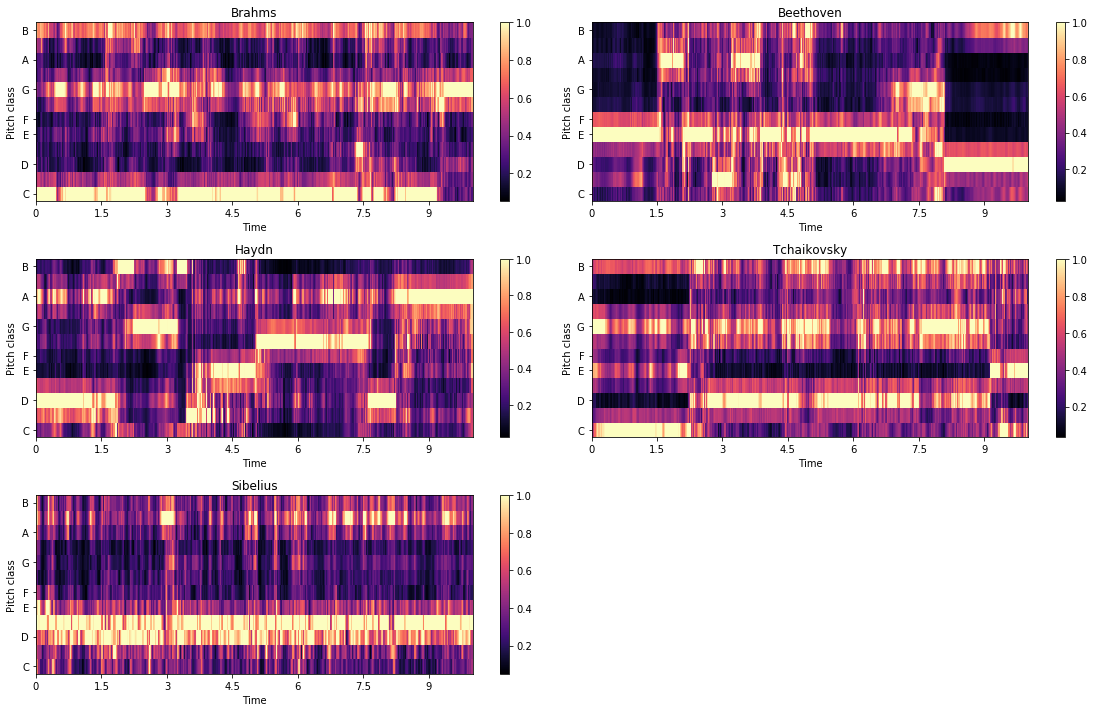

In [258]:
## Plot chromagrams
fig = plt.figure(figsize = (16,10))

plt.subplot(3, 2, 1)
chroma_os = librosa.feature.chroma_cqt(y=brahms[3,:], sr=sr, bins_per_octave=12)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Brahms')

plt.subplot(3, 2, 2)
chroma_os = librosa.feature.chroma_cqt(y=beethoven[3,:], sr=sr, bins_per_octave=12)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Beethoven')


plt.subplot(3, 2, 3)
chroma_os = librosa.feature.chroma_cqt(y=haydn[3,:], sr=sr, bins_per_octave=12)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Haydn')


plt.subplot(3, 2, 4)
chroma_os = librosa.feature.chroma_cqt(y=tchaik[3,:], sr=sr, bins_per_octave=12)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Tchaikovsky')


plt.subplot(3, 2, 5)
chroma_os = librosa.feature.chroma_cqt(y=sibelius[3,:], sr=sr, bins_per_octave=12)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Sibelius')
plt.tight_layout()
plt.savefig('Plots/EDA-chromagram.png')

plt.show()

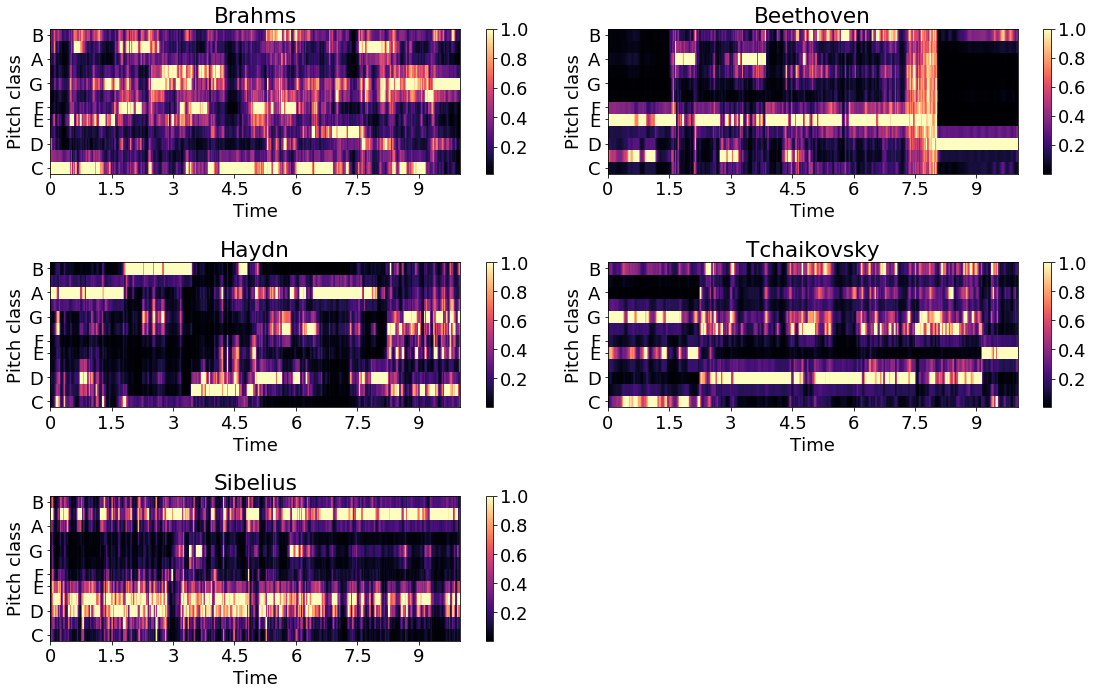

In [32]:
## Plot chromagrams
fig = plt.figure(figsize = (16,10))

plt.subplot(3, 2, 1)
chroma_os = librosa.feature.chroma_stft(y=brahms[3,:], sr=sr)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Brahms')

plt.subplot(3, 2, 2)
chroma_os = librosa.feature.chroma_stft(y=beethoven[3,:], sr=sr)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Beethoven')


plt.subplot(3, 2, 3)
chroma_os = librosa.feature.chroma_stft(y=haydn[3,:], sr=sr)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Haydn')


plt.subplot(3, 2, 4)
chroma_os = librosa.feature.chroma_stft(y=tchaik[3,:], sr=sr)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Tchaikovsky')


plt.subplot(3, 2, 5)
chroma_os = librosa.feature.chroma_stft(y=sibelius[3,:], sr=sr)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Sibelius')
plt.tight_layout()
plt.savefig('Plots/EDA-chromagram-stft.png')

plt.show()

- Chromagram features are sharper using STFT

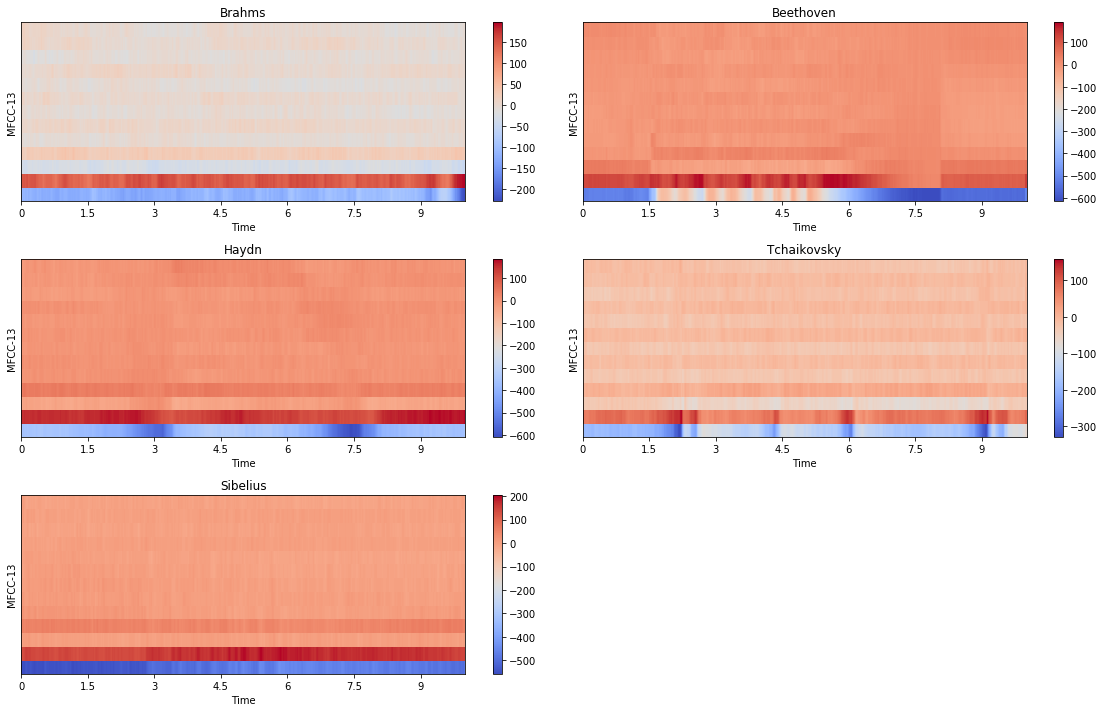

In [259]:
## MFCC features

fig = plt.figure(figsize = (16,10))

plt.subplot(3, 2, 1)
chroma_os = librosa.feature.mfcc(y=brahms[3,:], sr=sr, n_mfcc=13)
librosa.display.specshow(chroma_os, x_axis='time')
plt.ylabel("MFCC-13")
plt.colorbar()
plt.title('Brahms')

plt.subplot(3, 2, 2)
chroma_os = librosa.feature.mfcc(y=beethoven[3,:], sr=sr, n_mfcc=13)
librosa.display.specshow(chroma_os, x_axis='time')
plt.ylabel("MFCC-13")
plt.colorbar()
plt.title('Beethoven')


plt.subplot(3, 2, 3)
chroma_os = librosa.feature.mfcc(y=haydn[3,:], sr=sr, n_mfcc=13)
librosa.display.specshow(chroma_os,  x_axis='time')
plt.ylabel("MFCC-13")
plt.colorbar()
plt.title('Haydn')


plt.subplot(3, 2, 4)
chroma_os = librosa.feature.mfcc(y=tchaik[3,:], sr=sr, n_mfcc=13)
librosa.display.specshow(chroma_os,  x_axis='time')
plt.ylabel("MFCC-13")
plt.colorbar()
plt.title('Tchaikovsky')


plt.subplot(3, 2, 5)
chroma_os = librosa.feature.mfcc(y=sibelius[3,:], sr=sr, n_mfcc=13)
librosa.display.specshow(chroma_os, x_axis='time')
plt.ylabel("MFCC-13")
plt.colorbar()
plt.title('Sibelius')
plt.tight_layout()
plt.savefig('Plots/EDA-MFCC-13.png')

plt.show()

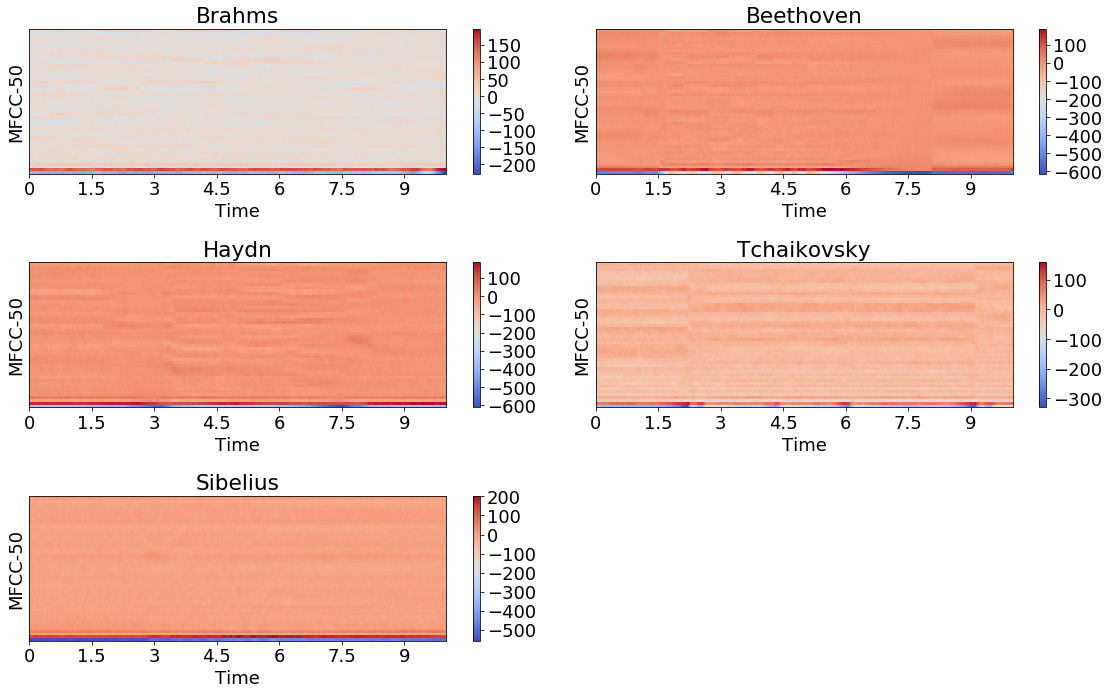

In [30]:
## MFCC features

fig = plt.figure(figsize = (16,10))

plt.subplot(3, 2, 1)
chroma_os = librosa.feature.mfcc(y=brahms[3,:], sr=sr, n_mfcc=50)
librosa.display.specshow(chroma_os, x_axis='time')
plt.ylabel("MFCC-50")
plt.colorbar()
plt.title('Brahms')

plt.subplot(3, 2, 2)
chroma_os = librosa.feature.mfcc(y=beethoven[3,:], sr=sr, n_mfcc=50)
librosa.display.specshow(chroma_os, x_axis='time')
plt.ylabel("MFCC-50")
plt.colorbar()
plt.title('Beethoven')


plt.subplot(3, 2, 3)
chroma_os = librosa.feature.mfcc(y=haydn[3,:], sr=sr, n_mfcc=50)
librosa.display.specshow(chroma_os,  x_axis='time')
plt.ylabel("MFCC-50")
plt.colorbar()
plt.title('Haydn')


plt.subplot(3, 2, 4)
chroma_os = librosa.feature.mfcc(y=tchaik[3,:], sr=sr, n_mfcc=50)
librosa.display.specshow(chroma_os,  x_axis='time')
plt.ylabel("MFCC-50")
plt.colorbar()
plt.title('Tchaikovsky')


plt.subplot(3, 2, 5)
chroma_os = librosa.feature.mfcc(y=sibelius[3,:], sr=sr, n_mfcc=50)
librosa.display.specshow(chroma_os, x_axis='time')
plt.ylabel("MFCC-50")
plt.colorbar()
plt.title('Sibelius')
plt.tight_layout()
plt.savefig('Plots/EDA-MFCC-50.png')

plt.show()

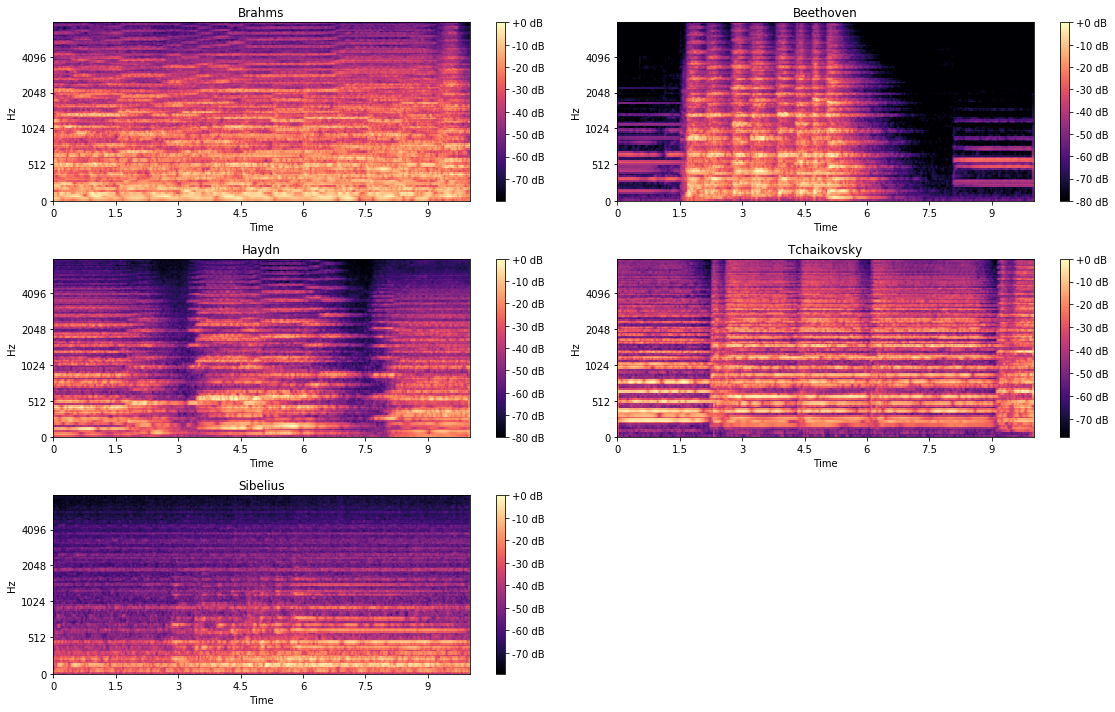

In [265]:
## Mel-Spectrogram

fig = plt.figure(figsize = (16,10))

plt.subplot(3, 2, 1)
S = librosa.feature.melspectrogram(y=brahms[3,:], sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Brahms')


plt.subplot(3, 2, 2)
S = librosa.feature.melspectrogram(y=beethoven[3,:], sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Beethoven')


plt.subplot(3, 2, 3)
S = librosa.feature.melspectrogram(y=haydn[3,:], sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Haydn')


plt.subplot(3, 2, 4)
S = librosa.feature.melspectrogram(y=tchaik[3,:], sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Tchaikovsky')


plt.subplot(3, 2, 5)
S = librosa.feature.melspectrogram(y=sibelius[3,:], sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Sibelius')
plt.tight_layout()
plt.savefig('Plots/EDA-mel-spec.png')

plt.show()

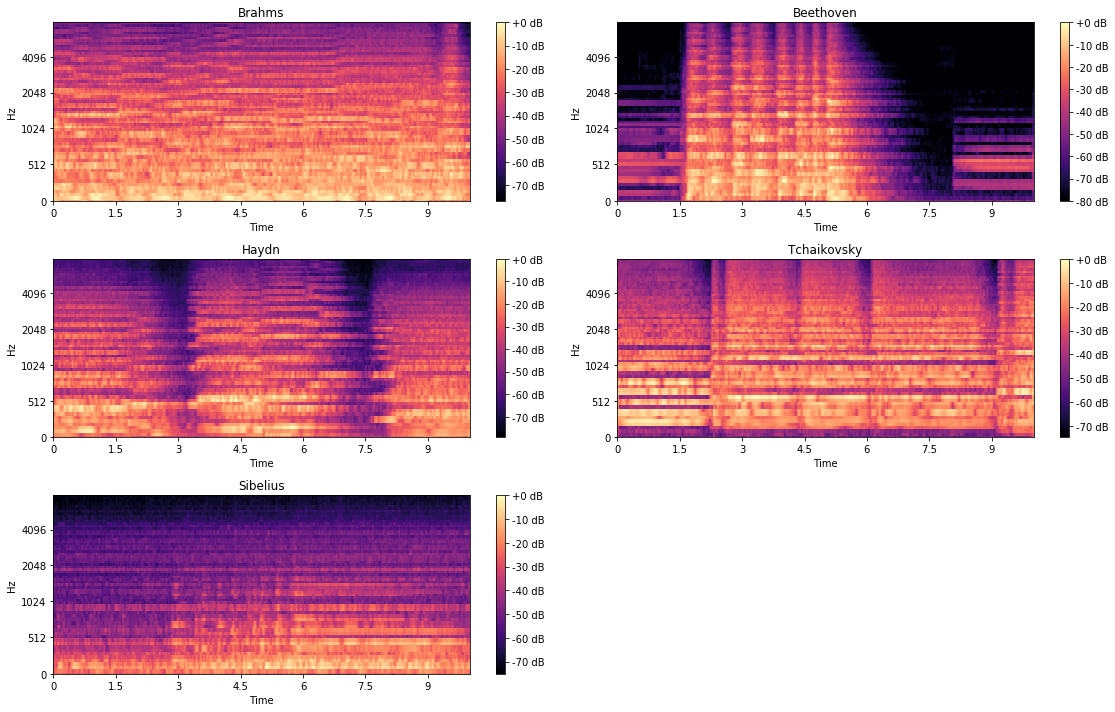

In [12]:
## Mel-Spectrogram

fig = plt.figure(figsize = (16,10))

plt.subplot(3, 2, 1)
S = librosa.feature.melspectrogram(y=brahms[3,:], sr=sr, n_mels=64, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Brahms')


plt.subplot(3, 2, 2)
S = librosa.feature.melspectrogram(y=beethoven[3,:], sr=sr, n_mels=64, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Beethoven')


plt.subplot(3, 2, 3)
S = librosa.feature.melspectrogram(y=haydn[3,:], sr=sr, n_mels=64, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Haydn')


plt.subplot(3, 2, 4)
S = librosa.feature.melspectrogram(y=tchaik[3,:], sr=sr, n_mels=64, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Tchaikovsky')


plt.subplot(3, 2, 5)
S = librosa.feature.melspectrogram(y=sibelius[3,:], sr=sr, n_mels=64, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Sibelius')
plt.tight_layout()
plt.savefig('Plots/EDA-mel-spec-64.png')

plt.show()

## Compute Chromagram Features

In [283]:
brahms_chroma = np.array([librosa.feature.chroma_cqt(y=brahms[i,:], sr=sr, bins_per_octave=12) 
                          for i in range(brahms.shape[0])])

In [284]:
beethoven_chroma = np.array([librosa.feature.chroma_cqt(y=beethoven[i,:], sr=sr, bins_per_octave=12) 
                          for i in range(beethoven.shape[0])])

In [285]:
haydn_chroma = np.array([librosa.feature.chroma_cqt(y=haydn[i,:], sr=sr, bins_per_octave=12) 
                          for i in range(haydn.shape[0])])

In [286]:
tchaik_chroma = np.array([librosa.feature.chroma_cqt(y=tchaik[i,:], sr=sr, bins_per_octave=12) 
                          for i in range(tchaik.shape[0])])

In [287]:
sibelius_chroma = np.array([librosa.feature.chroma_cqt(y=sibelius[i,:], sr=sr, bins_per_octave=12) 
                          for i in range(sibelius.shape[0])])

In [288]:
brahms_chroma.shape

(908, 12, 431)

In [289]:
## Save audio as CSV
np.save("Data/brahms-chroma-12", brahms_chroma, allow_pickle = False)
np.save("Data/beethoven-chroma-12", beethoven_chroma, allow_pickle = False)
np.save("Data/haydn-chroma-12", haydn_chroma, allow_pickle = False)
np.save("Data/sibelius-chroma-12", sibelius_chroma, allow_pickle = False)
np.save("Data/tchaik-chroma-12", tchaik_chroma, allow_pickle = False)

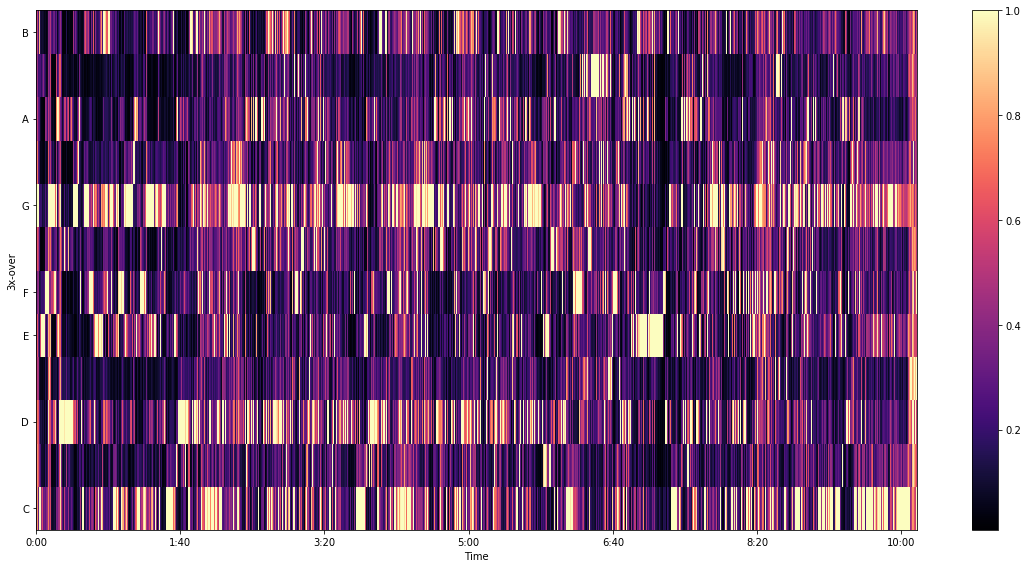

In [233]:
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(16, 8))
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')
plt.tight_layout()

## Compute and Save Additional Features

### Chroma-STFT

In [55]:
brahms_chroma = np.array([librosa.feature.chroma_stft(y=brahms[i,:], sr=sr) for i in range(brahms.shape[0])])
beethoven_chroma = np.array([librosa.feature.chroma_stft(y=beethoven[i,:], sr=sr) for i in range(beethoven.shape[0])])

In [56]:
haydn_chroma = np.array([librosa.feature.chroma_stft(y=haydn[i,:], sr=sr) for i in range(haydn.shape[0])])

In [57]:
tchaik_chroma = np.array([librosa.feature.chroma_stft(y=tchaik[i,:], sr=sr) for i in range(tchaik.shape[0])])
sibelius_chroma = np.array([librosa.feature.chroma_stft(y=sibelius[i,:], sr=sr) for i in range(sibelius.shape[0])])

In [58]:
np.save("Data/brahms-chroma-stft12", brahms_chroma, allow_pickle = False)
np.save("Data/beethoven-chroma-stft12", beethoven_chroma, allow_pickle = False)
np.save("Data/haydn-chroma-stft12", haydn_chroma, allow_pickle = False)
np.save("Data/sibelius-chroma-stft12", sibelius_chroma, allow_pickle = False)
np.save("Data/tchaik-chroma-stft12", tchaik_chroma, allow_pickle = False)

## Mel-Spectrogram

In [13]:
brahms_stft = np.array([librosa.feature.melspectrogram(y=brahms[i,:], sr=sr, n_mels=64, fmax=8000) 
                          for i in range(brahms.shape[0])])
beethoven_stft = np.array([librosa.feature.melspectrogram(y=beethoven[i,:], sr=sr, n_mels=64, fmax=8000) 
                             for i in range(beethoven.shape[0])])
print("Beethoven")
haydn_stft = np.array([librosa.feature.melspectrogram(y=haydn[i,:], sr=sr, n_mels=64, fmax=8000) 
                             for i in range(haydn.shape[0])])
tchaik_stft = np.array([librosa.feature.melspectrogram(y=tchaik[i,:], sr=sr, n_mels=64, fmax=8000) 
                             for i in range(tchaik.shape[0])])
sibelius_stft = np.array([librosa.feature.melspectrogram(y=sibelius[i,:], sr=sr, n_mels=64, fmax=8000) 
                             for i in range(sibelius.shape[0])])
print("STFT done")

Beethoven
STFT done


In [14]:
# to dB
brahms_stft_dB = np.array([librosa.power_to_db(brahms_stft[i,:,:], ref=np.max) 
                          for i in range(brahms_stft.shape[0])])
beethoven_stft_dB = np.array([librosa.power_to_db(beethoven_stft[i,:,:], ref=np.max) 
                          for i in range(beethoven_stft.shape[0])])
print("Beethoven")
haydn_stft_dB = np.array([librosa.power_to_db(haydn_stft[i,:,:], ref=np.max) 
                          for i in range(haydn_stft.shape[0])])
tchaik_stft_dB = np.array([librosa.power_to_db(tchaik_stft[i,:,:], ref=np.max) 
                          for i in range(tchaik_stft.shape[0])])
sibelius_stft_dB = np.array([librosa.power_to_db(sibelius_stft[i,:,:], ref=np.max) 
                          for i in range(sibelius_stft.shape[0])])

Beethoven


In [16]:
np.save("Data/brahms-stft-dB", brahms_stft_dB, allow_pickle = False)
np.save("Data/beethoven-stft-dB", beethoven_stft_dB, allow_pickle = False)
np.save("Data/haydn-stft-dB", haydn_stft_dB, allow_pickle = False)
np.save("Data/sibelius-stft-dB", sibelius_stft_dB, allow_pickle = False)
np.save("Data/tchaik-stft-dB", tchaik_stft_dB, allow_pickle = False)

## MFCC - 13

In [66]:
brahms_mfcc = np.array([librosa.feature.mfcc(y=brahms[i,:], sr=sr, n_mfcc=13) for i in range(brahms.shape[0])])
beethoven_mfcc = np.array([librosa.feature.mfcc(y=beethoven[i,:], sr=sr, n_mfcc=13) 
                           for i in range(beethoven.shape[0])])
print("Beethoven")
haydn_mfcc = np.array([librosa.feature.mfcc(y=haydn[i,:], sr=sr, n_mfcc=13) for i in range(haydn.shape[0])])
tchaik_mfcc = np.array([librosa.feature.mfcc(y=tchaik[i,:], sr=sr, n_mfcc=13) for i in range(tchaik.shape[0])])
sibelius_mfcc = np.array([librosa.feature.mfcc(y=sibelius[i,:], sr=sr, n_mfcc=13) for i in range(sibelius.shape[0])])

Beethoven


In [67]:
np.save("Data/brahms-mfcc-13", brahms_mfcc, allow_pickle = False)
np.save("Data/beethoven-mfcc-13", beethoven_mfcc, allow_pickle = False)
np.save("Data/haydn-mfcc-13", haydn_mfcc, allow_pickle = False)
np.save("Data/sibelius-mfcc-13", sibelius_mfcc, allow_pickle = False)
np.save("Data/tchaik-mfcc-13", tchaik_mfcc, allow_pickle = False)

# Train/Test Split and Normalize


In [70]:
# brahms_chroma = np.load("Data/brahms-chroma-stft12.npy")
# beethoven_chroma = np.load("Data/beethoven-chroma-stft12.npy")
# haydn_chroma = np.load("Data/haydn-chroma-stft12.npy")
# sibelius_chroma = np.load("Data/sibelius-chroma-stft12.npy")
# tchaik_chroma = np.load("Data/tchaik-chroma-stft12.npy")

brahms_mfcc = np.load("Data/brahms-mfcc-13.npy")
beethoven_mfcc = np.load("Data/beethoven-mfcc-13.npy")
haydn_mfcc = np.load("Data/haydn-mfcc-13.npy")
sibelius_mfcc = np.load("Data/sibelius-mfcc-13.npy")
tchaik_mfcc = np.load("Data/tchaik-mfcc-13.npy")

brahms_stft_dB = np.load("Data/brahms-stft-dB.npy")
beethoven_stft_dB = np.load("Data/beethoven-stft-dB.npy")
haydn_stft_dB = np.load("Data/haydn-stft-dB.npy")
sibelius_stft_dB = np.load("Data/sibelius-stft-dB.npy")
tchaik_stft_dB = np.load("Data/tchaik-stft-dB.npy")

In [71]:
chroma = np.concatenate((beethoven_chroma, brahms_chroma, haydn_chroma, sibelius_chroma, tchaik_chroma))
mfcc = np.concatenate((beethoven_mfcc, brahms_mfcc, haydn_mfcc, sibelius_mfcc, tchaik_mfcc))
stft_dB = np.concatenate((beethoven_stft_dB, brahms_stft_dB, haydn_stft_dB, sibelius_stft_dB, tchaik_stft_dB))

In [19]:
np.round(chroma.shape[0]*0.7)

5366.0

In [73]:
print("Chroma:", np.mean(chroma), np.std(chroma))
print("MFCC:", np.mean(mfcc), np.std(mfcc))
print("STFT:", np.mean(stft_dB), np.std(stft_dB))

Chroma: 0.2806374888288301 0.29424393073518096
MFCC: -15.351313770438622 104.4164497835367
STFT: -39.25553443598964 16.763774999817553


In [20]:
chroma.shape

(7665, 12, 431)

| Composer  | Label  | 
|:---:|---|
| Beethoven  | 0  |
| Brahms  | 1  |
| Haydn  | 2  |
| Sibelius |3 |
| Tchaikovsky | 4|

In [21]:
labels = np.array([0]*beethoven_chroma.shape[0] + [1]*brahms_chroma.shape[0] +\
            [2]*haydn_chroma.shape[0] + [3]*sibelius_chroma.shape[0] + \
            [4]*tchaik_chroma.shape[0])

In [22]:
np.random.seed(17)
train_ind = np.random.choice(chroma.shape[0], 5366)

In [23]:
len(train_ind)

5366

## Normalize by Mean and SD

In [31]:
print(np.mean(chroma), np.std(chroma))

0.2806374888288301 0.29424393073518096


In [32]:
chroma = (chroma - np.mean(chroma))/np.std(chroma)
np.mean(chroma)

1.6958427576143378e-15

In [33]:
train_chroma = chroma[train_ind, :, :]
test_chroma = np.delete(chroma, train_ind, axis = 0) 
train_labels = labels[train_ind]
test_labels = np.delete(labels, train_ind) 

In [34]:
print("Train:", train_chroma.shape)
print("Test:", test_chroma.shape)
print("Labels:", len(train_labels), len(test_labels))

Train: (5366, 12, 431)
Test: (3842, 12, 431)
Labels: 5366 3842


In [35]:
## Training Set balance
np.unique(train_labels, return_counts = True)[1]/train_chroma.shape[0]

array([0.23071189, 0.11535594, 0.25344763, 0.17107715, 0.22940738])

In [36]:
## Test Set balance
np.unique(test_labels, return_counts = True)[1]/test_chroma.shape[0]

array([0.22852681, 0.12441437, 0.25117126, 0.18427902, 0.21160854])

In [65]:
## Save training and test
np.save("Data/train_chroma12", train_chroma.astype('float32'), allow_pickle = False)
np.save("Data/test_chroma12", test_chroma.astype('float32'), allow_pickle = False)
np.save("Data/test_labels_chroma12", test_labels, allow_pickle = False)
np.save("Data/train_labels_chroma12", train_labels, allow_pickle = False)

In [ ]:
mfcc = (mfcc - np.mean(mfcc))/np.std(mfcc)
train_mfcc = mfcc[train_ind, :, :]
test_mfcc = np.delete(mfcc, train_ind, axis = 0) 
train_labels = labels[train_ind]
test_labels = np.delete(labels, train_ind) 

In [67]:
## Save training and test - Split into 2 files
np.save("Data/train_mfcc13", train_mfcc.astype('float32'), allow_pickle = False)
np.save("Data/test_mfcc13", test_mfcc.astype('float32'), allow_pickle = False)
np.save("Data/test_labels_mfcc13", test_labels, allow_pickle = False)
np.save("Data/train_labels_mfcc13", train_labels, allow_pickle = False)

In [39]:
print("Train:", train_mfcc.shape)
print("Test:", test_mfcc.shape)
print("Labels:", len(train_labels), len(test_labels))

Train: (5366, 13, 431)
Test: (3842, 13, 431)
Labels: 5366 3842


In [66]:
np.mean(mfcc)

-3.025102091811275e-16

## Split STFT into Smaller Files for Training

In [55]:
## Normalize
stft_dB = (stft_dB - np.mean(stft_dB))/np.std(stft_dB)

In [44]:
train1, train2, train3, train4, train5 = np.array_split(train_ind, 5)
len(train1)

1074

In [45]:
test_ind = np.delete(np.arange(stft_dB.shape[0]), train_ind)
np.random.shuffle(test_ind)

In [46]:
test_ind

array([6380,  236, 3252, ..., 5057, 4347, 2426])

In [47]:
test1, test2, test3, test4, test5 = np.array_split(test_ind, 5)
len(test1)

769

In [49]:
3 in train_ind

False

In [56]:
## Need to split train and test into multiple sets
stft_train1 = stft_dB[train1, :,:]
stft_train2 = stft_dB[train2, :,:]
stft_train3 = stft_dB[train3, :,:]
stft_train4 = stft_dB[train4, :,:]
stft_train5 = stft_dB[train5, :,:]

stft_test1 = stft_dB[test1, :,:]
stft_test2 = stft_dB[test2, :,:]
stft_test3 = stft_dB[test3, :,:]
stft_test4 = stft_dB[test4, :,:]
stft_test5 = stft_dB[test5, :,:]


train_labels1 = labels[train1]
train_labels2 = labels[train2]
train_labels3 = labels[train3]
train_labels4 = labels[train4]
train_labels5 = labels[train5]

test_labels1 = labels[test1]
test_labels2 = labels[test2]
test_labels3 = labels[test3]
test_labels4 = labels[test4]
test_labels5 = labels[test5]

In [57]:
np.unique(test_labels4, return_counts = True)

(array([0, 1, 2, 3, 4]), array([170, 105, 205, 138, 150]))

In [58]:
np.unique(train_labels4, return_counts = True)

(array([0, 1, 2, 3, 4]), array([250, 114, 275, 192, 242]))

In [68]:
## Save training and test
np.save("Data/train_stft-dB-1", stft_train1.astype('float32'), allow_pickle = False)
np.save("Data/test_stft-dB-1", stft_test1.astype('float32'), allow_pickle = False)
np.save("Data/train_labels_stft-dB-1", train_labels1, allow_pickle = False)
np.save("Data/test_labels_stft-dB-1", test_labels1, allow_pickle = False)

In [69]:
## Save training and test
np.save("Data/train_stft-dB-2", stft_train2.astype('float32'), allow_pickle = False)
np.save("Data/test_stft-dB-2", stft_test2.astype('float32'), allow_pickle = False)
np.save("Data/train_labels_stft-dB-2", train_labels2, allow_pickle = False)
np.save("Data/test_labels_stft-dB-2", test_labels2, allow_pickle = False)

## Save training and test
np.save("Data/train_stft-dB-3", stft_train3.astype('float32'), allow_pickle = False)
np.save("Data/test_stft-dB-3", stft_test3.astype('float32'), allow_pickle = False)
np.save("Data/train_labels_stft-dB-3", train_labels3, allow_pickle = False)
np.save("Data/test_labels_stft-dB-3", test_labels3, allow_pickle = False)

## Save training and test
np.save("Data/train_stft-dB-4", stft_train4.astype('float32'), allow_pickle = False)
np.save("Data/test_stft-dB-4", stft_test4.astype('float32'), allow_pickle = False)
np.save("Data/train_labels_stft-dB-4", train_labels4, allow_pickle = False)
np.save("Data/test_labels_stft-dB-4", test_labels4, allow_pickle = False)

## Save training and test
np.save("Data/train_stft-dB-5", stft_train5.astype('float32'), allow_pickle = False)
np.save("Data/test_stft-dB-5", stft_test5.astype('float32'), allow_pickle = False)
np.save("Data/train_labels_stft-dB-5", train_labels5, allow_pickle = False)
np.save("Data/test_labels_stft-dB-5", test_labels5, allow_pickle = False)


In [61]:
stft_train1.shape

(1074, 64, 431)

In [62]:
train_chroma.shape

(5366, 12, 431)

In [64]:
np.array([1,2,3,4]).astype('float32')

array([1., 2., 3., 4.], dtype=float32)